In [1]:
#https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
import scanpy as sc
import scirpy as ir

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from matplotlib import rcParams


In [2]:
path_filtered = '../preprocessing/hmgu_data_preproc/01_filtered_data.h5ad'
path_normalized = '../preprocessing/hmgu_data_preproc/02_normalized_data.h5ad'
path_high_var = '../preprocessing/hmgu_data_preproc/03_variableGenes_data.h5ad'
path_tcr = '../preprocessing/hmgu_data_preproc/04_merged_data.h5ad'
path_tcr_filtered = '../preprocessing/hmgu_data_preproc/05_tcr_filtered_data.h5ad'
path_tcr_anno = '../preprocessing/hmgu_data_preproc/06_tcr_annotation_data.h5ad'

#adata = sc.read(path_tcr)
adata = sc.read(path_tcr_anno)

In [3]:
adata


AnnData object with n_obs × n_vars = 10954 × 5000
    obs: 'Sample', 'donor', 'organ', 'sort', 'method', 'file', 'is_TRA_p', 'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source', 'cell types', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_

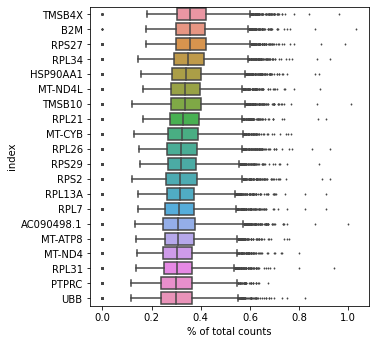

In [4]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [5]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [6]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

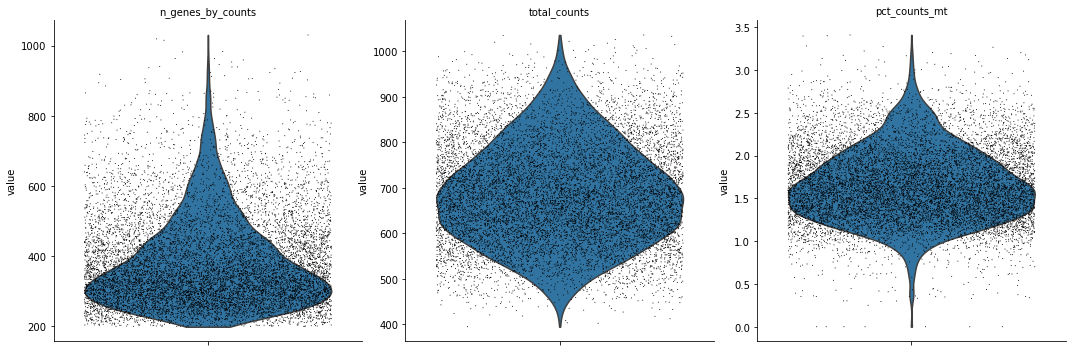

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

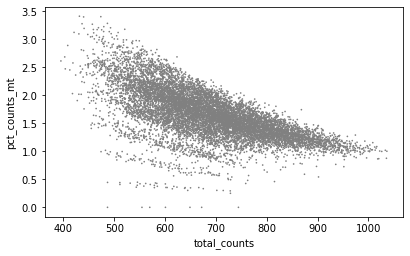

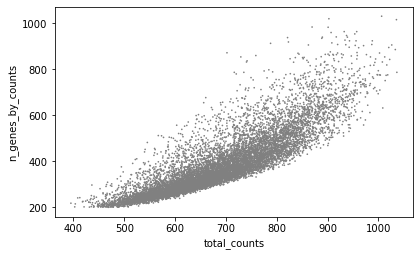

In [8]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [9]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [10]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

Trying to set attribute `._uns` of view, copying.


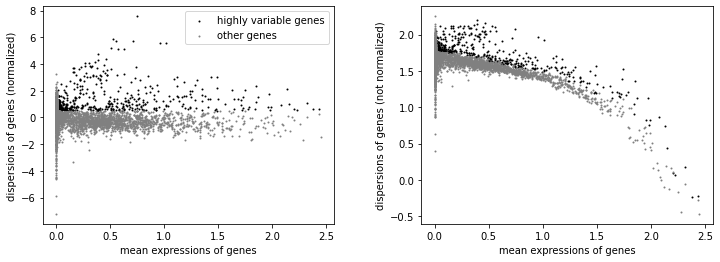

In [11]:
sc.pl.highly_variable_genes(adata)

In [12]:
adata.raw = adata

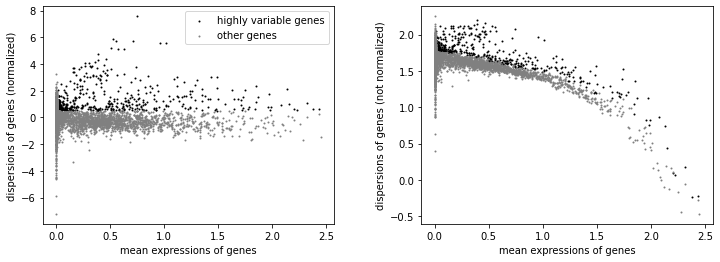

In [13]:
sc.pl.highly_variable_genes(adata)

In [14]:
adata = adata[:, adata.var.highly_variable]

In [16]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


#sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)
#30 and 20 gives bad batch, separated for source cluster

In [17]:
sc.tl.umap(adata)

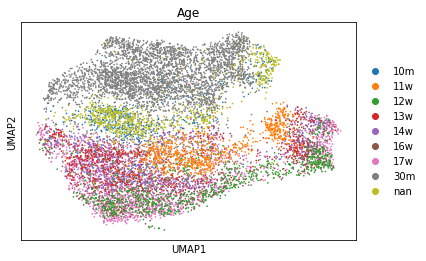

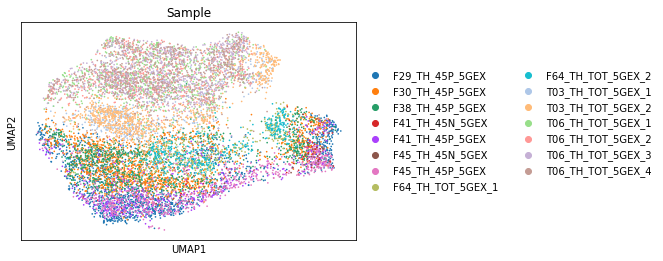

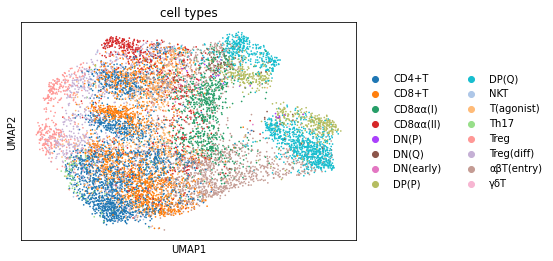

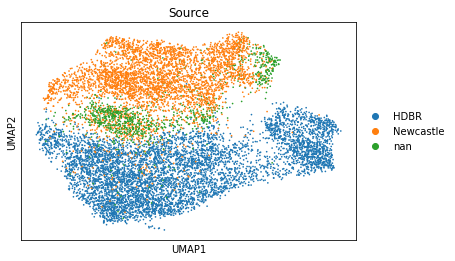

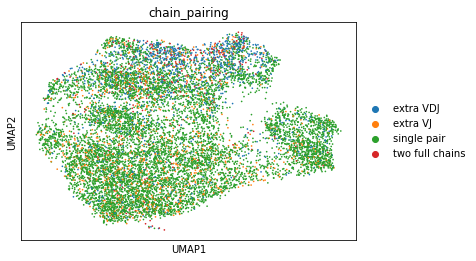

In [18]:
#sc.pl.umap(adata), color=['CST3', 'NKG7', 'PPBP'])
#sc.pl.umap(adata)#, color=['CST3', 'NKG7', 'PPBP'])

#sc.pl.umap(adata, color=['Source', 'cell types', 'mt_fraction'])
sc.pl.umap(adata, color=['Age'])
sc.pl.umap(adata, color=['Sample'])
sc.pl.umap(adata, color=['cell types'])
sc.pl.umap(adata, color=['Source'])
sc.pl.umap(adata, color=['chain_pairing'])


#age, celltypes,source, and sample have similar cluster shape


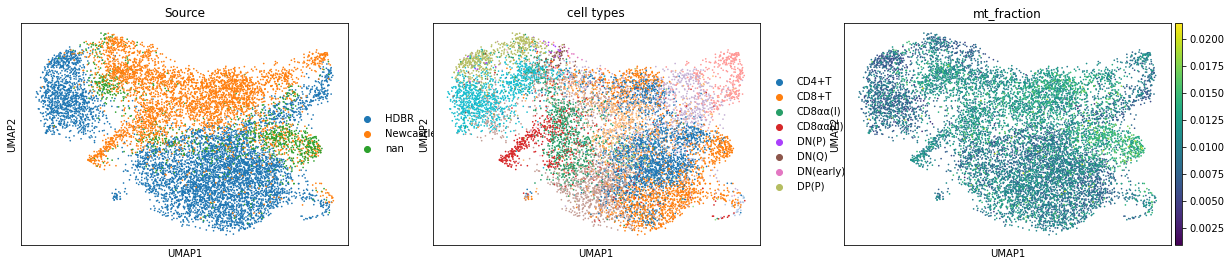

In [78]:
#sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)
sc.pl.umap(adata, color=['Source', 'cell types', 'mt_fraction'], use_raw=False)
#sc.pl.umap(adata, color=['leiden', 'Source', 'cell types','Age','chain_pairing'], use_raw=False)

In [ ]:
sc.tl.leiden(adata)

In [ ]:
#sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])
sc.pl.umap(adata, color=['leiden','Source', 'cell types', 'mt_fraction'])
sc.pl.umap(adata, color=['leiden', 'Source', 'cell types','Age','chain_pairing'])

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

In [ ]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

In [ ]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [ ]:
#how to determine marker genes??
#dont there given to you

#dont use pca use usemap or something(didnt hear well) maybe try tsne

#can stratify on gender and age as well to look for patterns

#do leiden cluster then visualize genes which make cluster different from other clusters
#stick with umap or tesne (preferablly umap) dont switch back and forth with visualization

#all obs that start with ir are not very interesting, same with obs used for preprocessing like n counts
#intersting is age, gender, celltypes, chain paring, etc. checks vars in var to see 

#do psuedotime and plot against cells

#check out mvtcr/experiments/optunacovid

#use model moe (mixture of experts)

#need to check time trajectories as well

#batch correction methods

#could also focus on celltypes and keep celltypes as a control varaible

#check umap version, reinstall umap